In [65]:
import os
import sys
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patch
import numpy as np
import pandas as pd
%matplotlib inline
%precision 4
plt.style.use('ggplot')
from scipy import linalg
np.set_printoptions(suppress=True)

# Students may (probably should) ignore this code. It is just here to make pretty arrows.

def plot_vectors(vs):
    """Plot vectors in vs assuming origin at (0,0)."""
    n = len(vs)
    X, Y = np.zeros((n, 2))
    U, V = np.vstack(vs).T
    plt.quiver(X, Y, U, V, range(n), angles='xy', scale_units='xy', scale=1)
    xmin, xmax = np.min([U, X]), np.max([U, X])
    ymin, ymax = np.min([V, Y]), np.max([V, Y])
    xrng = xmax - xmin
    yrng = ymax - ymin
    xmin -= 0.05*xrng
    xmax += 0.05*xrng
    ymin -= 0.05*yrng
    ymax += 0.05*yrng
    plt.axis([xmin, xmax, ymin, ymax])

### define matrix

In [8]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(A)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


### calculate eigendecomposition

In [9]:
values, vectors = np.linalg.eig(A)
print(values)
print(vectors)

[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]


## Gaussian Elimination

In [14]:
def gausselim(themat):
    for i in range(len(themat[0])):
        for j in range(i+1,len(themat)):
            m = themat[j][i]/themat[i][i]   # Ratio of (i,j) elt by (i,i) (diagonal) elt
            themat[j] = [themat[j][k]-m*themat[i][k] for k in range(len(themat[0]))]
    return themat

In [15]:
gausselim(A)

array([[ 1,  2,  3],
       [ 0, -3, -6],
       [ 0,  0,  0]])

### Another way to create Matrix http://web.stanford.edu/class/cs231a/section/section1.pdf

In [29]:
v1 = np.array([3, 0, -2])
v2 = np.array([2, 0, -2])
v3 = np.array([0, 1, 1])
M = np.vstack([v1, v2, v3])
print(M)

[[ 3  0 -2]
 [ 2  0 -2]
 [ 0  1  1]]


In [30]:
v_orig = np.array([1, 2, 3])
v = np.expand_dims(v_orig, 1)
v

array([[1],
       [2],
       [3]])

In [31]:
M.dot(v)

array([[-3],
       [-4],
       [ 5]])

In [61]:
M@v

array([[-3],
       [-4],
       [ 5]])

<function matplotlib.patches.Patch.draw(self, renderer)>

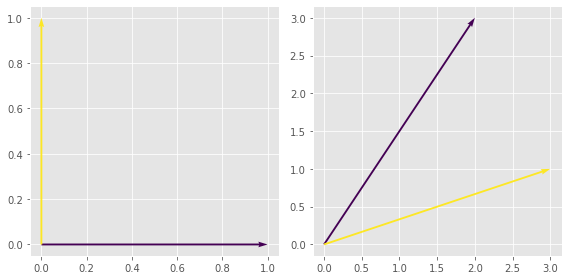

In [68]:
e1 = np.array([1,0])
e2 = np.array([0,1])
A = np.array([[2,3],[3,1]])
v1=A.dot(e1)
v2=A.dot(e2)
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_vectors([e1, e2])
plt.subplot(1,2,2)
plot_vectors([v1,v2])
plt.tight_layout()
#help(plt.Circle)
plt.Circle(np.array([0,0]),radius=1)
plt.Circle.draw

Note that the inner product is just matrix multiplication of a 1×n vector with an n×1 vector. In fact, we may write:

<v,w>=v^{t} w
The outer product of two vectors is just the opposite. It is given by:

v⊗w=vw^{t}

In [70]:
v2

array([3, 1])

In [51]:
np.multiply(M, v)

array([[ 3,  0, -2],
       [ 4,  0, -4],
       [ 0,  3,  3]])

In [45]:
v1 = v
v2 = np.expand_dims(M[:, 0], 1)
print(v1)
print(v2)

[[1]
 [2]
 [3]]
[[3]
 [2]
 [0]]


In [46]:
np.cross(v1, v2, axisa = 0, axisb = 0)

array([[-6,  9, -4]])

In [49]:
v1.dot(v2.T)

array([[3, 2, 0],
       [6, 4, 0],
       [9, 6, 0]])

In [79]:
np.trace(M)

4

## Determinant and Inverse

In [78]:
np.linalg.norm(M)

4.795831523312719

In [54]:
np.linalg.det(M)

2.0000000000000004

In [55]:
np.linalg.inv(M)

array([[ 1. , -1. ,  0. ],
       [-1. ,  1.5,  1. ],
       [ 1. , -1.5, -0. ]])

In [56]:
eigvals, eigvecs = np.linalg.eig(M)
print(eigvals)

[2.+0.00000000e+00j 1.+5.29411669e-08j 1.-5.29411669e-08j]


In [59]:
U, S, Vtranspose = np.linalg.svd(M)
print(U)
print(S)
print(Vtranspose.T)

[[-0.77845901  0.25025106 -0.57565265]
 [-0.61081737 -0.09077359  0.78655089]
 [ 0.14458113  0.96391626  0.22352121]]
[4.60629442 1.29193852 0.33607519]
[[-0.77220678  0.44058288 -0.45780281]
 [ 0.03138773  0.74610072  0.66509287]
 [ 0.63459554  0.49921983 -0.58997293]]


## Source: https://cs231n.github.io/python-numpy-tutorial/

In [73]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import interp2d
from scipy.linalg import inv, solve, det, eig

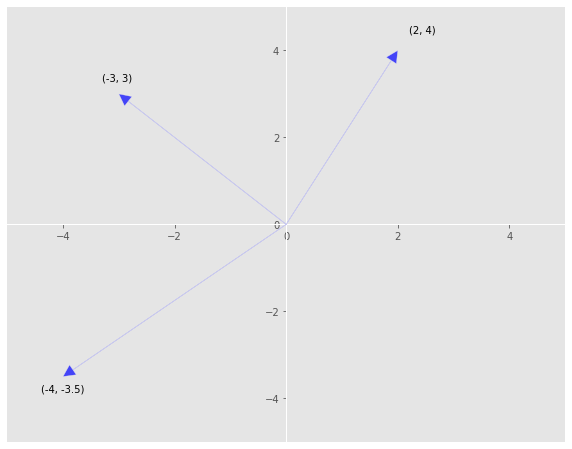

In [74]:
fig, ax = plt.subplots(figsize=(10, 8))
# Set the axes through the origin
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')

ax.set(xlim=(-5, 5), ylim=(-5, 5))
ax.grid()
vecs = ((2, 4), (-3, 3), (-4, -3.5))
for v in vecs:
    ax.annotate('', xy=v, xytext=(0, 0),
                arrowprops=dict(facecolor='blue',
                shrink=0,
                alpha=0.7,
                width=0.5))
    ax.text(1.1 * v[0], 1.1 * v[1], str(v))
plt.show()

# Scalar Multiplication

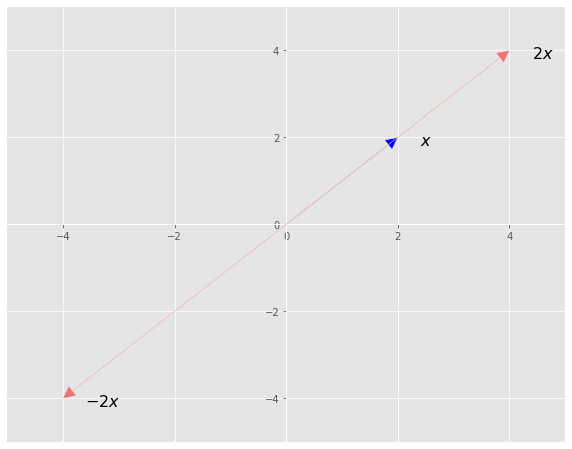

In [75]:
fig, ax = plt.subplots(figsize=(10, 8))
# Set the axes through the origin
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')

ax.set(xlim=(-5, 5), ylim=(-5, 5))
x = (2, 2)
ax.annotate('', xy=x, xytext=(0, 0),
            arrowprops=dict(facecolor='blue',
            shrink=0,
            alpha=1,
            width=0.5))
ax.text(x[0] + 0.4, x[1] - 0.2, '$x$', fontsize='16')


scalars = (-2, 2)
x = np.array(x)

for s in scalars:
    v = s * x
    ax.annotate('', xy=v, xytext=(0, 0),
                arrowprops=dict(facecolor='red',
                shrink=0,
                alpha=0.5,
                width=0.5))
    ax.text(v[0] + 0.4, v[1] - 0.2, f'${s} x$', fontsize='16')
plt.show()

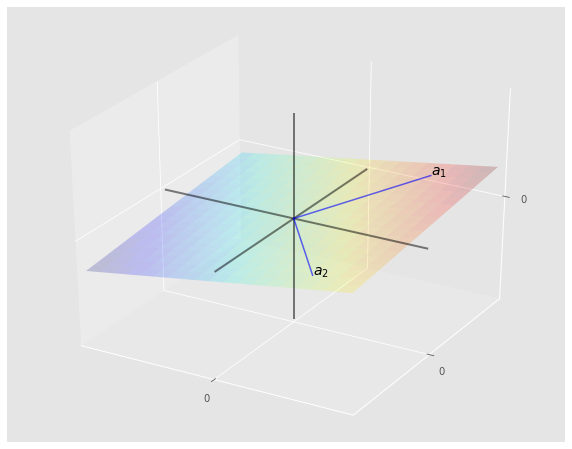

In [76]:
fig = plt.figure(figsize=(10, 8))
ax = fig.gca(projection='3d')

x_min, x_max = -5, 5
y_min, y_max = -5, 5

α, β = 0.2, 0.1

ax.set(xlim=(x_min, x_max), ylim=(x_min, x_max), zlim=(x_min, x_max),
       xticks=(0,), yticks=(0,), zticks=(0,))

gs = 3
z = np.linspace(x_min, x_max, gs)
x = np.zeros(gs)
y = np.zeros(gs)
ax.plot(x, y, z, 'k-', lw=2, alpha=0.5)
ax.plot(z, x, y, 'k-', lw=2, alpha=0.5)
ax.plot(y, z, x, 'k-', lw=2, alpha=0.5)


# Fixed linear function, to generate a plane
def f(x, y):
    return α * x + β * y

# Vector locations, by coordinate
x_coords = np.array((3, 3))
y_coords = np.array((4, -4))
z = f(x_coords, y_coords)
for i in (0, 1):
    ax.text(x_coords[i], y_coords[i], z[i], f'$a_{i+1}$', fontsize=14)

# Lines to vectors
for i in (0, 1):
    x = (0, x_coords[i])
    y = (0, y_coords[i])
    z = (0, f(x_coords[i], y_coords[i]))
    ax.plot(x, y, z, 'b-', lw=1.5, alpha=0.6)


# Draw the plane
grid_size = 20
xr2 = np.linspace(x_min, x_max, grid_size)
yr2 = np.linspace(y_min, y_max, grid_size)
x2, y2 = np.meshgrid(xr2, yr2)
z2 = f(x2, y2)
ax.plot_surface(x2, y2, z2, rstride=1, cstride=1, cmap=cm.jet,
                linewidth=0, antialiased=True, alpha=0.2)
plt.show()


## Eigen Values vectors plot

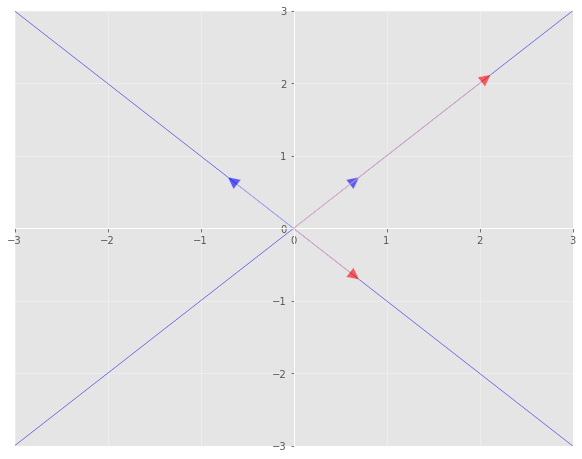

In [77]:
A = ((1, 2),
     (2, 1))
A = np.array(A)
evals, evecs = eig(A)
evecs = evecs[:, 0], evecs[:, 1]

fig, ax = plt.subplots(figsize=(10, 8))
# Set the axes through the origin
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')
ax.grid(alpha=0.4)

xmin, xmax = -3, 3
ymin, ymax = -3, 3
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

# Plot each eigenvector
for v in evecs:
    ax.annotate('', xy=v, xytext=(0, 0),
                arrowprops=dict(facecolor='blue',
                shrink=0,
                alpha=0.6,
                width=0.5))

# Plot the image of each eigenvector
for v in evecs:
    v = A @ v
    ax.annotate('', xy=v, xytext=(0, 0),
                arrowprops=dict(facecolor='red',
                shrink=0,
                alpha=0.6,
                width=0.5))

# Plot the lines they run through
x = np.linspace(xmin, xmax, 3)
for v in evecs:
    a = v[1] / v[0]
    ax.plot(x, a * x, 'b-', lw=0.4)

plt.show()

In [80]:
M = np.array([[-3, np.sqrt(2)], [np.sqrt(2), -2]])

In [155]:
M = np.array([[-0.5, 1], [-1,-0.5]])
val, vec = np.linalg.eig(M)
print(val)
print(vec)

[-0.5+1.j -0.5-1.j]
[[0.7071+0.j     0.7071-0.j    ]
 [0.    +0.7071j 0.    -0.7071j]]


In [145]:
M = np.array([[2, 5], [-2,-4]])
val, vec = np.linalg.eig(M)
print(val)
print(vec)

[-1.+1.j -1.-1.j]
[[ 0.8452+0.j     0.8452-0.j   ]
 [-0.5071+0.169j -0.5071-0.169j]]


In [157]:
0.8452-0.169

0.6762

In [148]:
vec = vec.T

In [149]:
vec

array([[ 0.8452+0.j   , -0.5071+0.169j],
       [ 0.8452-0.j   , -0.5071-0.169j]])

In [150]:
vec[0]*(1/vec[0][0])

array([ 1. +0.j , -0.6+0.2j])

In [151]:
vec[0]*(1/vec[0][1])

array([-1.5-0.5j,  1. +0.j ])

In [152]:
vec[1]*(1/vec[1][0])

array([ 1. +0.j , -0.6-0.2j])

In [153]:
vec[1]*(1/vec[1][1])

array([-1.5+0.5j,  1. +0.j ])

In [88]:
val, vec = np.linalg.eig(M)

In [89]:
np.linalg.norm(vec[1])

1.0919284281983377

In [93]:
vec 

array([[ 0.7071, -0.5547],
       [-0.7071,  0.8321]])

In [96]:
np.sqrt(2)/2

0.7071067811865476